This is code for the House Sales Price Kaggle competition - a ML regression problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

#Importing Files
training = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
testing = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [2]:
#Let us look at the data
training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#What are the columns
training.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Preliminary EDA

First we will briefly look at how the sale price of houeses changes over time.

In [4]:
#Creating a time DF

time_df = pd.DataFrame({'year' : training['YrSold'], 'month' : training['MoSold'], 'SalePrice' : training['SalePrice']})
time_df['dateSold'] = pd.to_datetime(time_df[['year', 'month']].assign(DAY=1))

time_df.head()

,year,month,SalePrice,dateSold
0,2008,2,208500,2008-02-01
1,2007,5,181500,2007-05-01
2,2008,9,223500,2008-09-01
3,2006,2,140000,2006-02-01
4,2008,12,250000,2008-12-01


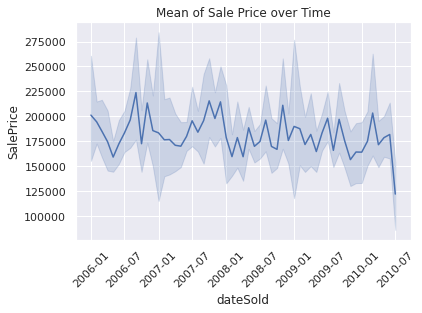

In [5]:
#Mean of Sales Price

sns.lineplot(data = time_df, x = 'dateSold', y = 'SalePrice')
plt.title('Mean of Sale Price over Time')
plt.xticks(rotation=45)
plt.show()

In [6]:
#Mean Sale Price
print('Mean Sales Prices')
print('min', np.min(time_df.groupby(['year', 'month'])['SalePrice'].agg(np.mean)))
print('max', np.max(time_df.groupby(['year', 'month'])['SalePrice'].agg(np.mean)))

time_df.groupby(['year', 'month'])['SalePrice'].agg(np.mean)

Mean Sales Prices
min 121750.0
max 223768.86666666667


year  month
2006  1        201090.000000
      2        194322.222222
      3        184982.200000
      4        174312.814815
      5        158928.289474
      6        172283.333333
      7        183211.059701
      8        196239.956522
      9        223768.866667
      10       172356.708333
      11       213285.000000
      12       185545.000000
2007  1        183234.615385
      2        176301.750000
      3        176567.782609
      4        170772.608696
      5        169873.511628
      6        179725.813559
      7        195396.843137
      8        183941.075000
      9        195533.818182
      10       215428.812500
      11       197709.333333
      12       214414.500000
2008  1        178504.692308
      2        159370.000000
      3        178505.277778
      4        159293.346154
      5        188334.473684
      6        169730.941176
      7        174562.653061
      8        196076.965517
      9        169626.470588
      10       166690.636364
  

We see that the mean sale price fluctuated roughly between 155,000 and 225,000 over the five years. The only month that is the exception is July 2010. 

July 2010 only had 6 sales, with the maximum being sold for 180,000.

Next we will examine the number of sales that occurred between the years of 2006 and 2009. We exclude 2010 as we only have information for up to July.

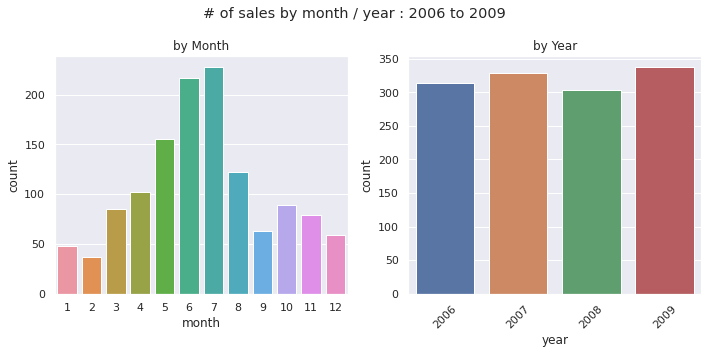

In [7]:
#Plot mean of sales price

fig, ax = plt.subplots(1, 2, figsize = (10,5))

sns.countplot(data = time_df.loc[time_df['year'] != 2010], x = 'month', ax = ax[0])
ax[0].set_title('by Month')
ax[0].tick_params(axis='x', rotation=0)

sns.countplot(data = time_df.loc[time_df['year'] != 2010], x = 'year',  ax = ax[1])
ax[1].set_title('by Year')
ax[1].tick_params(axis='x', rotation=45)

fig.suptitle('# of sales by month / year : 2006 to 2009')

plt.tight_layout()
plt.show()

We see from above that most sales occurred in the 'Summer/Warmer' Months (May, June, July, Auguest). The number of sales stayed relatively constant over the four years.

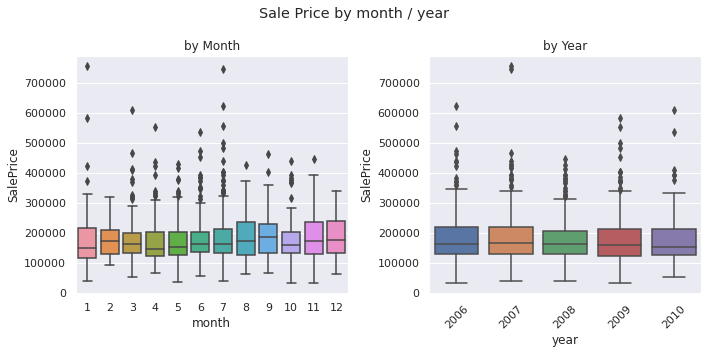

In [8]:
#Plot mean of sales price

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.boxplot(data = time_df, x = 'month', y = 'SalePrice', ax = ax[0])
ax[0].set_title('by Month')
ax[0].tick_params(axis='x', rotation=0)

sns.boxplot(data = time_df, x = 'year', y = 'SalePrice', ax = ax[1])
ax[1].set_title('by Year')
ax[1].tick_params(axis='x', rotation=45)

fig.suptitle('Sale Price by month / year')

plt.tight_layout()
plt.show()

We see from the year boxplot figure, that the means and IQRs are all very similar. This is shown in more detail below.

In [9]:
#Examining Quantiles of the sale price by year
pcs   = [[x, np.percentile(time_df.loc[time_df['year'] == x]['SalePrice'], 25), np.percentile(time_df.loc[time_df['year'] == x]['SalePrice'], 75)] for x in range(2006, 2011)]

pcs_df_year = pd.DataFrame(pcs, columns = ['year', 'LQ', 'UQ'])

pcs_df_year['IQR'] = pcs_df_year['UQ'] - pcs_df_year['LQ'] 

pcs_df_year.set_index('year')

,LQ,UQ,IQR
year,,,
2006,131375.0,218782.5,87407.5
2007,129900.0,219500.0,89600.0
2008,131250.0,207000.0,75750.0
2009,125250.0,212750.0,87500.0
2010,128100.0,213250.0,85150.0


In [10]:
#Examining Quantiles of the sale price by year
pcs   = [[x, np.percentile(time_df.loc[time_df['month'] == x]['SalePrice'], 25), np.percentile(time_df.loc[time_df['month'] == x]['SalePrice'], 75)] for x in range(1, 13)]

pcs_df_month = pd.DataFrame(pcs, columns = ['month', 'LQ', 'UQ'])

pcs_df_month['IQR'] = pcs_df_month['UQ'] - pcs_df_month['LQ'] 

pcs_df_month.set_index('month')

,LQ,UQ,IQR
month,,,
1,118250.0,215500.0,97250.0
2,129175.0,211225.0,82050.0
3,133725.0,200593.0,66868.0
4,124000.0,202900.0,78900.0
5,127750.0,204812.5,77062.5
6,136000.0,204000.0,68000.0
7,132625.0,212975.0,80350.0
8,126250.0,237639.5,111389.5
9,135000.0,231585.0,96585.0


Let us look at the distribution of the SalePrice.

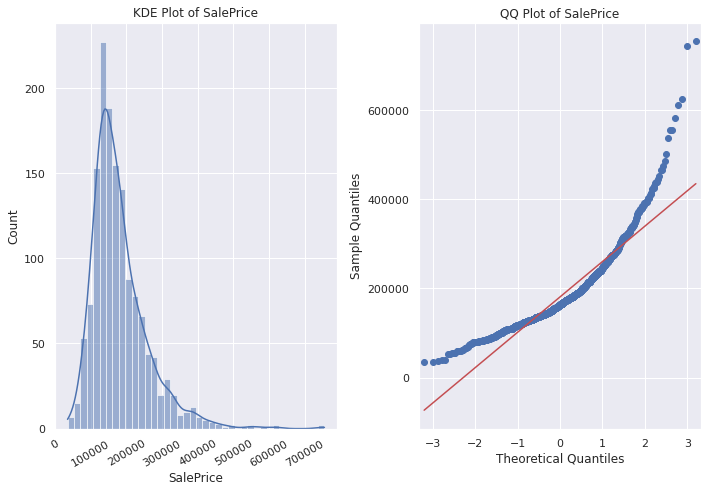

In [11]:
from statsmodels.graphics.gofplots import qqplot

#Distribution of SalePrice
#

fig, ax = plt.subplots(1,2, figsize = (10,7))
sns.histplot(data = training, x = 'SalePrice', kde = True, ax = ax[0], bins = 40)

qqplot(training['SalePrice'],line='s', ax = ax[1])

ax[0].tick_params(axis='x', rotation=30)

ax[0].set_title('KDE Plot of SalePrice')
ax[1].set_title('QQ Plot of SalePrice')

plt.tight_layout()

plt.show()

We see that Sale Price is right skewed from the right. The data is not normally districuted. We will perform a transoformation later on to address this. Perhaps a log transformation will make the data more normally distributes?

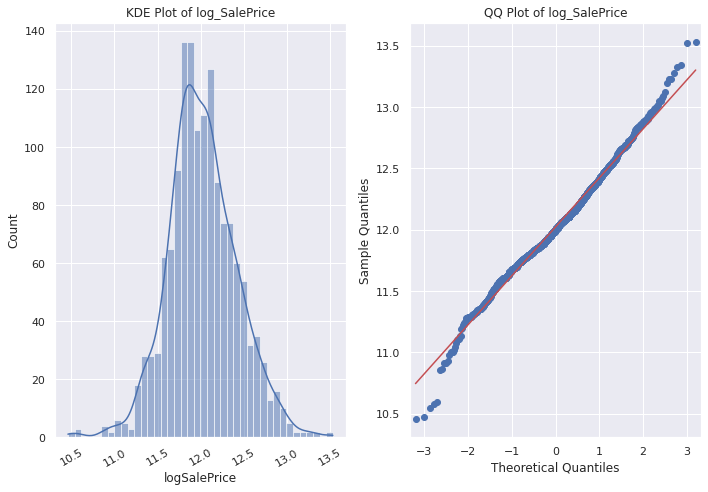

In [12]:
#Distribution of log_SalePrice

training['logSalePrice'] = np.log(training['SalePrice'])

fig, ax = plt.subplots(1,2, figsize = (10,7))
sns.histplot(data = training, x = 'logSalePrice', kde = True, ax = ax[0], bins = 40)

qqplot(training['logSalePrice'],line='s', ax = ax[1])

ax[0].tick_params(axis='x', rotation=30)

ax[0].set_title('KDE Plot of log_SalePrice')
ax[1].set_title('QQ Plot of log_SalePrice')

plt.tight_layout()

plt.show()

We see from the QQ Plot that the log transformes data more closely follows a normal distribution.

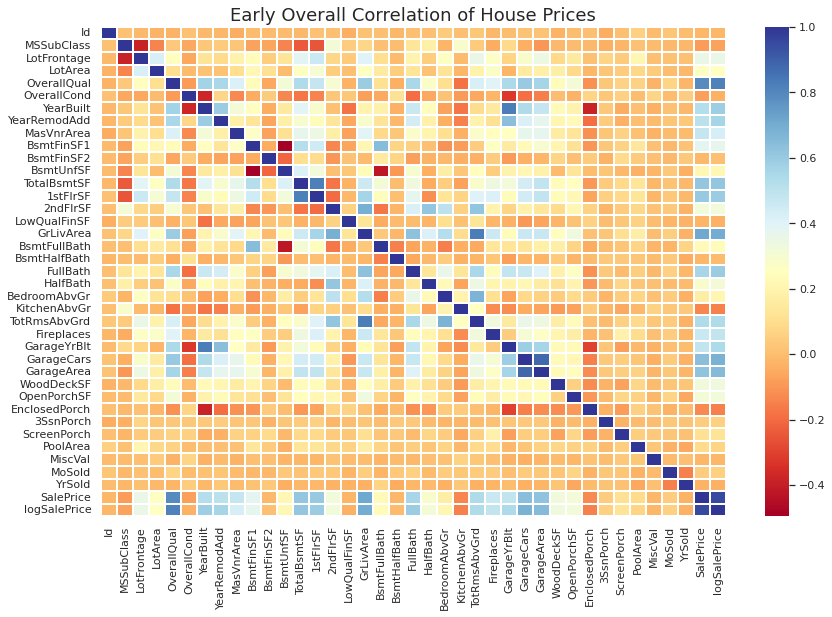

In [13]:
#Correlation

corr = training.corr()
plt.figure(figsize=(14,9))
plt.title('Early Overall Correlation of House Prices', fontsize=18)
sns.heatmap(corr,annot=False,cmap='RdYlBu',linewidths=0.2,annot_kws={'size':20})
plt.show()

The above is a preliminary examination of correlation between features in the data. Much of it is to be cleaned. Some features listed here also should not be considered numerical - eg MSSubClass and MoSold.

However, from an early glance we see that Overall Quality is highly correlated with Sale Price.

Text(0.5, 1.0, 'QverallQual vs SalePrice')

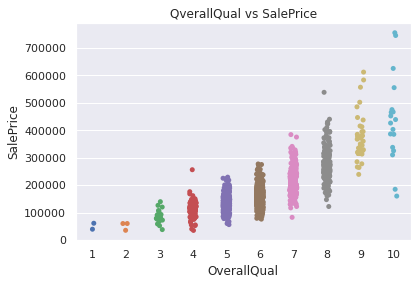

In [14]:
sns.stripplot(data = training, x = 'OverallQual', y = 'SalePrice')

plt.title('QverallQual vs SalePrice')

We see that as the overall quality increases, the sale price tends to increase as well.

# Data Cleaning

First we will drop the ID columns.

In [15]:
#Saving ID from Testing
testing_Id = testing['Id']

for df in [training, testing]:
    df.drop(['Id'], axis = 1, inplace = True)

testing_Id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

Next we will examine missing values.

In [16]:
#What data is missing?
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Training


<AxesSubplot:>

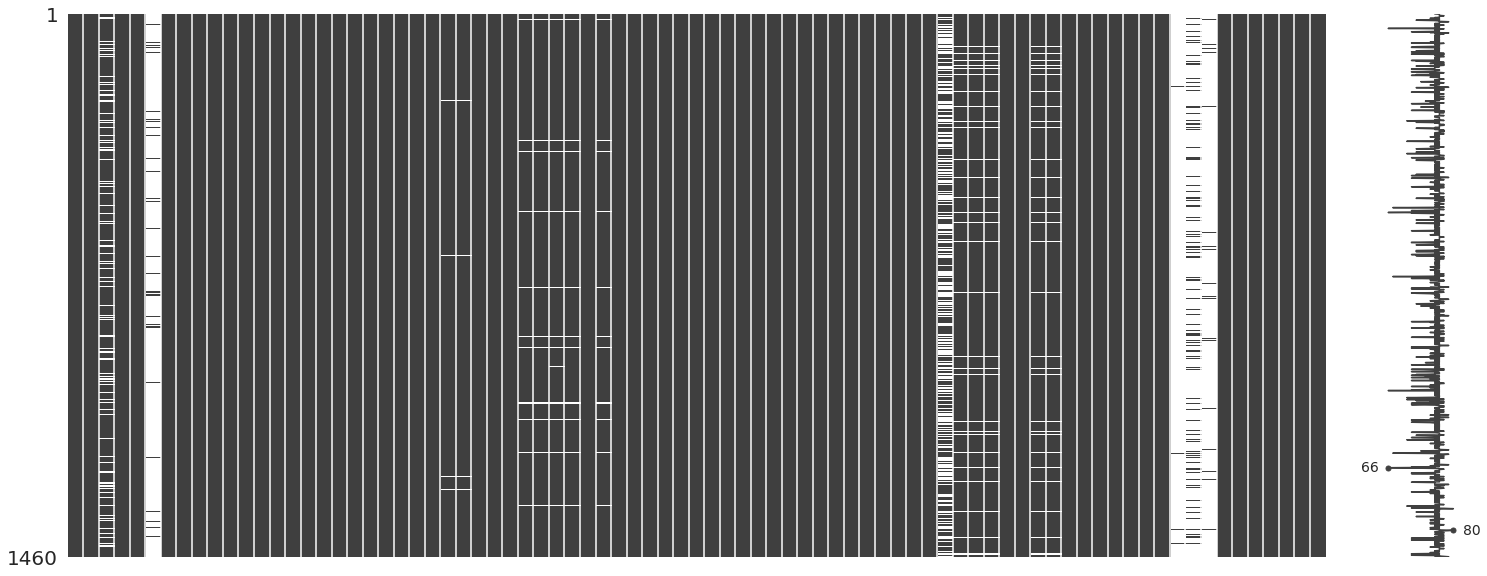

In [17]:
import missingno

print('Training')
missingno.matrix(training)

In [18]:
#What data is missing?
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Testing


<AxesSubplot:>

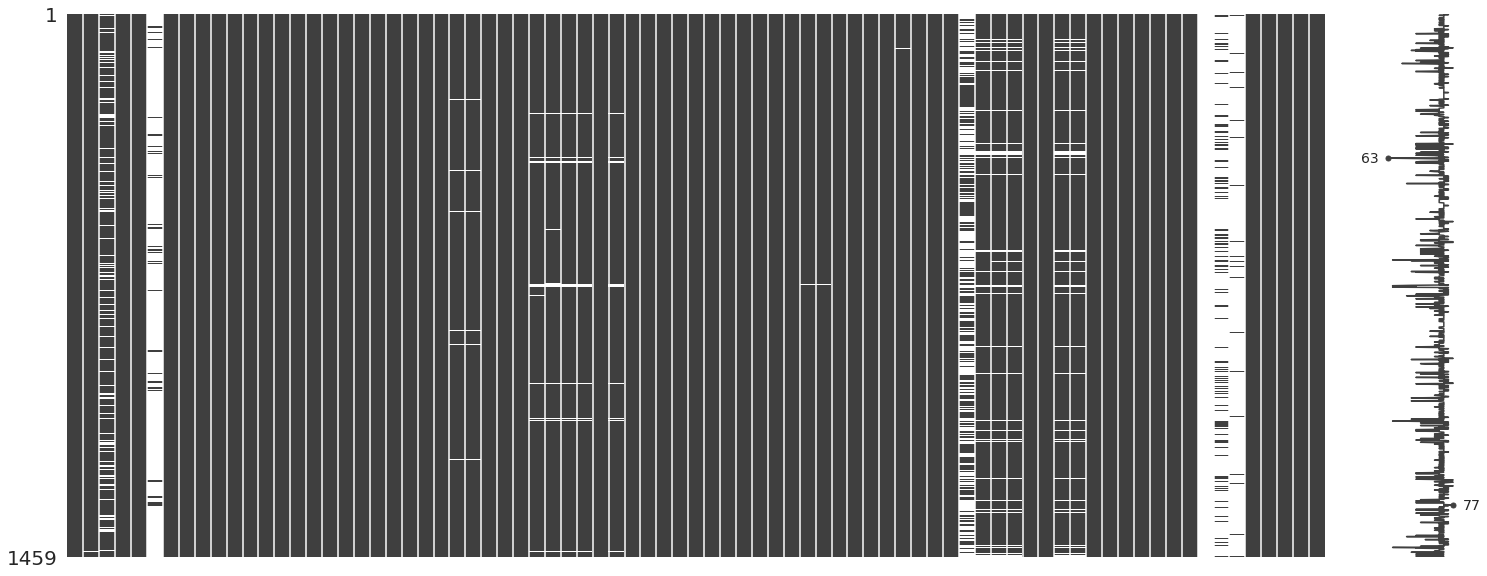

In [19]:
print('Testing')
missingno.matrix(testing)

Let us group together the categorical and numerical features.

In [20]:
numericF = training.select_dtypes(include=np.number).columns.tolist()
catF = training.select_dtypes(exclude=np.number).columns.tolist()

print('The numeric features are:')
print(numericF)

The numeric features are:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'logSalePrice']


In [21]:
print('The categorical features are:')
print(catF)

The categorical features are:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


There is an error in the above as MSSubClass is classified as a numeric feature when it is in fact a categorical feature. We make this change.

The MoSold feature can similarly be changed.

In [22]:
numericF.remove('MSSubClass')
numericF.remove('MoSold')

print(numericF)

catF.append('MSSubClass')
catF.append('MoSold')
print(catF)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice', 'logSalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Gara

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
dtype: float64


<AxesSubplot:title={'center':'Proportion of missing values for Numerical Features - Training'}>

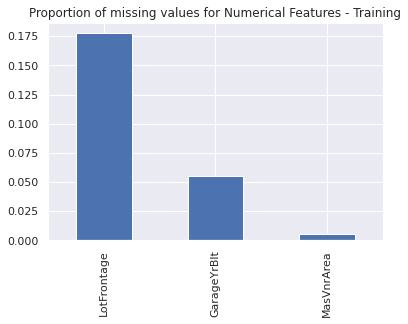

In [23]:
#Plotting Missing Values of Numeric
missingNum = training[numericF].isna().mean()
missingNum = missingNum[missingNum > 0]
missingNum.sort_values(inplace = True, ascending = False) 

print(missingNum)


plt.title('Proportion of missing values for Numerical Features - Training')
missingNum.plot.bar()

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64


<AxesSubplot:title={'center':'Proportion of missing values for Categorical Features - Training'}>

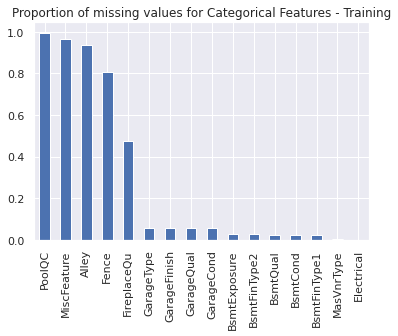

In [24]:
#Plotting Missing Values of Cat
missingCat = training[catF].isna().mean()
missingCat = missingCat[missingCat > 0]
missingCat.sort_values(inplace = True, ascending = False) 

print(missingCat)

plt.title('Proportion of missing values for Categorical Features - Training')
missingCat.plot.bar()

# Cleaning

We see there are much more missing values in the categorical features than in the numeric features.

Three features (PoolQC, MiscFeature, and Alley) have more than 90% missing values. Is this explainable?

**PoolQC**

We are told that PoolQC being NA means that there is no pool. This is shown below as there does not exist a row with an NA PoolQC entry that has a non-zero PoolArea.

In [25]:
training.loc[training['PoolQC'].isna() & training['PoolArea'] != 0][['PoolQC', 'PoolArea']]

,PoolQC,PoolArea


Due to the sparsity of the PoolQC feature, we drop the two pool related features.

In [26]:
#Dropping Pool Features.
for df in [training, testing]:
    df.drop(['PoolArea', 'PoolQC'], axis = 1, inplace = True)

#Updating Feature lists
numericF.remove('PoolArea')
catF.remove('PoolQC')

**MiscFeature**

MiscFeature has the second most number of NA values of the categorical variables. We are told that MiscFeature being NA means that there is no miscellaneous feature. This is shown below as there does not exist a row with an NA MiscFeature entry that has a non-zero MiscVal entry.

In [27]:
training.loc[training['MiscFeature'].isna() & training['MiscVal'] != 0][['MiscFeature', 'MiscVal']]

,MiscFeature,MiscVal


In [28]:
testing.loc[testing['MiscFeature'].isna() & testing['MiscVal'] != 0][['MiscFeature', 'MiscVal']]

,MiscFeature,MiscVal


**Fireplaces**

FireplaceQu has NA values of the categorical variables. We are told that FireplaceQu being NA means that there is no fireplace. This is shown below as there does not exist a row with an NA FireplaceQu entry that has a non-zero Fireplaces entry.

In [29]:
training.loc[training['FireplaceQu'].isna() & training['Fireplaces'] != 0][['FireplaceQu', 'Fireplaces']]

,FireplaceQu,Fireplaces


In [30]:
testing.loc[testing['FireplaceQu'].isna() & testing['Fireplaces'] != 0][['FireplaceQu', 'Fireplaces']]

,FireplaceQu,Fireplaces


**Garages**

There are seven garage related columns: GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, and GarageCond. 

Type/Finish/Qual/Cond/YrBlt all have missing values. The same proportion is missing for all columns. Is this due to there being no garage? One way to check if there is no garage is to see if GarageCars and GarageArea are 0.

In [31]:
training[training['GarageArea'] == 0][['GarageArea','GarageCars','GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageArea,GarageCars,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,0,0,NaN,NaN,NaN,NaN,NaN
48,0,0,NaN,NaN,NaN,NaN,NaN
78,0,0,NaN,NaN,NaN,NaN,NaN
88,0,0,NaN,NaN,NaN,NaN,NaN
89,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1349,0,0,NaN,NaN,NaN,NaN,NaN
1407,0,0,NaN,NaN,NaN,NaN,NaN
1449,0,0,NaN,NaN,NaN,NaN,NaN
1450,0,0,NaN,NaN,NaN,NaN,NaN


In [32]:
#printing rows where garage area is 0 and garage data is no missing
for index, row in training.iterrows():

    if row['GarageArea'] == 0:
        for col in ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']:
            if pd.notna(row[col]):                
                print(index, col)
        if row['GarageCars'] != 0:
            print(index, cars)   

In [33]:
#printing rows where garage area is 0 and garage data is no missing
for index, row in testing.iterrows():

    if row['GarageArea'] == 0:
        for col in ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']:
            if pd.notna(row[col]):                
                print(index, col)
        if row['GarageCars'] != 0:
            print(index, cars)   

Again, we see that whenever we have a GarageArea of 0, the remaining Garage features are 0, or NA.

**Basements**

There are ten basement related columns: BsmtFullBath, BsmtHalfBath, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1,BsmtFinType2, BsmtFinSF2, BsmtUnfSF and TotalBsmtSF.

In [34]:
#Collecting Basement Features
bsfeatures = ['BsmtQual', 'BsmtCond','BsmtFullBath', 'BsmtHalfBath', 'BsmtExposure', 'BsmtFinType1','BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

bsfeatures

['BsmtQual',
 'BsmtCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF']

First we look at the rows of the training data containing NA values for any of the basement features.

In [35]:
training.loc[training[bsfeatures].isna().any(axis = 1)][bsfeatures]

,BsmtQual,BsmtCond,BsmtFullBath,BsmtHalfBath,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
332,Gd,TA,1,0,No,GLQ,1124,NaN,479,1603,3206
342,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0


Next we look at the rows of the testing data containing NA values for any of the basement features.

In [36]:
testing.loc[testing[bsfeatures].isna().any(axis = 1)][bsfeatures]

,BsmtQual,BsmtCond,BsmtFullBath,BsmtHalfBath,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
27,Gd,TA,0.0,0.0,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0
125,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
133,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
269,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
318,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
354,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
387,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
388,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
396,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
397,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0


**Fireplaces**

MasVnrType has NA values of the categorical variables. We are told that MasVnrType being NA means that there is no applicable detail in the property. This is shown below as there does not exist a row with an NA MasVnrType entry that has a non-zero MasVnrArea entry.

In [37]:
training.loc[training['MasVnrArea']==0][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
...,...,...
1454,None,0.0
1455,None,0.0
1457,None,0.0
1458,None,0.0


# Imputing Missing Values

We will will replace missing values in the categorical features with 'NA' where a missing value indicates that feature is not applicable. EG a missing value in Alley means there is no alley access. MasVnrType gets a special entry of None

We will ignore Basement features for now.

In [38]:
#Categorical NA
cat_NA_fill = ['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature']

for col in cat_NA_fill:
    training[col].fillna('NA', inplace = True)
    testing[col].fillna('NA', inplace = True)
    
training['MasVnrType'].fillna('None', inplace = True)
testing['MasVnrType'].fillna('None', inplace = True)

For the other categorical data, we will replace the value with the mode from the training data. Functional will get a special value of 'Typ'

In [39]:
cat_Mode_fill = ['Utilities', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Electrical', 'MSZoning']

for col in cat_Mode_fill:
    
    modeVal = training[col].mode()[0]
    print(col, modeVal)
    training[col].fillna(modeVal, inplace = True)
    testing[col].fillna(modeVal, inplace = True)

training['Functional'].fillna('Typ', inplace = True)
testing['Functional'].fillna('Typ', inplace = True)

Utilities AllPub
Exterior1st VinylSd
Exterior2nd VinylSd
SaleType WD
Electrical SBrkr
MSZoning RL


In [40]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

**Garage**

While we have addressed most Garage features, garageArea and garageCars still need to be addressed. NA values will be replaced with 0.

In [41]:
#Filling in remaining Garage Features
for df in [training, testing]:
    df['GarageArea'].fillna(0, inplace = True)
    df['GarageCars'].fillna(0, inplace = True)

GarageYrBuilt is still missing some values. Is this feature strongly correlated to the feature YrBuilt?

In [42]:
#correlation between YrBuilt and GarageYrBuilt

training['YearBuilt'].corr(training['GarageYrBlt'])

0.825667484174342

We see there is a stong positive correlation between the features. We drop GarageYrBlt as a result.

In [43]:
#Dropping GaradgeYrBuilt
for df in [training,testing]:
    df.drop(['GarageYrBlt'], axis = 1, inplace = True)

numericF.remove('GarageYrBlt')

**Lot Frontage**

Lot Frontage is NA from many rows. We impute the values based on either the mean or median of neighborhoods.

Text(0.5, 1.0, 'LotFrontage per Neighborhood')

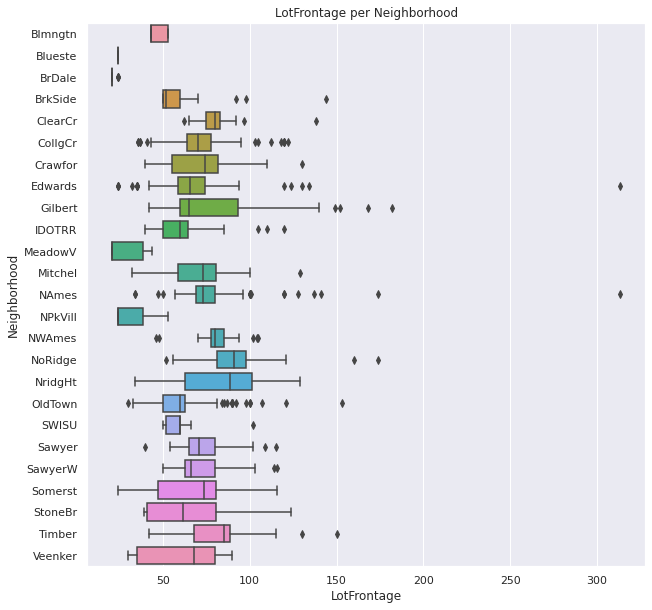

In [44]:
orderNeighboorhood = training['Neighborhood'].sort_values().unique()

fig, ax = plt.subplots (1,1, figsize = (10,10))
sns.boxplot(data = training, x = 'LotFrontage', y = 'Neighborhood', order = orderNeighboorhood, ax = ax)
plt.title('LotFrontage per Neighborhood')

The boxplot shows that many neighborhoods have outliers in for their LotFrontage. As a result, we will use the median as opposed to the means. 

In [45]:
#Collecting Medians
medianLotFrontage = {}

for nbhood in orderNeighboorhood:
    medianLotFrontage[nbhood] = training.loc[training['Neighborhood'] == nbhood]['LotFrontage'].median()
    
medianLotFrontage

{'Blmngtn': 43.0,
 'Blueste': 24.0,
 'BrDale': 21.0,
 'BrkSide': 52.0,
 'ClearCr': 80.0,
 'CollgCr': 70.0,
 'Crawfor': 74.0,
 'Edwards': 65.5,
 'Gilbert': 65.0,
 'IDOTRR': 60.0,
 'MeadowV': 21.0,
 'Mitchel': 73.0,
 'NAmes': 73.0,
 'NPkVill': 24.0,
 'NWAmes': 80.0,
 'NoRidge': 91.0,
 'NridgHt': 88.5,
 'OldTown': 60.0,
 'SWISU': 60.0,
 'Sawyer': 71.0,
 'SawyerW': 66.5,
 'Somerst': 73.5,
 'StoneBr': 61.5,
 'Timber': 85.0,
 'Veenker': 68.0}

In [46]:
#Imputing Medians to LotFrontage

for df in [training, testing]:
    for index, row in df.iterrows():
        if pd.isna(row['LotFrontage']):
            df.loc[index, 'LotFrontage'] = medianLotFrontage[row['Neighborhood']]
            

**MasVnrArea**

All NA entries for MasVnrArea are set to 0.

In [47]:
training['MasVnrArea'].fillna(0, inplace = True)
testing['MasVnrArea'].fillna(0, inplace = True)

**Kitchen Qual**

One entry of KitchenQual in the testing dataset is NA. We shall set it to be the mode of the testing data

In [48]:
#Filling Val
testing['KitchenQual'].fillna(training['KitchenQual'].mode()[0], inplace = True)

In [49]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [50]:
#Getting rows where any basement feature is NA

training.loc[training[bsfeatures].isna().any(axis = 1)][bsfeatures]

,BsmtQual,BsmtCond,BsmtFullBath,BsmtHalfBath,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
332,Gd,TA,1,0,No,GLQ,1124,NaN,479,1603,3206
342,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,0


Most rows indicate that no basement is present, except for Rows 332 and 948.

Row 332: Feature 'BsmtFinType2' is NA, however, Feature 'BsmtFinSF2' is non-zero. Since the feature 'BsmtUnfSF' is non-zero, this indicates that there is still unfinished area in the basement. We set 'BsmtFinType2' to 'Unf' to reflect this, as opposed to setting it to the mode of the column.

Row 948: Feature 'BsmtExposure' is missing, indicating that there is no Basement. As only feature 'BsmtUnfSF' is non-zero, this indicates that there is no finishd basement. We will set the value to be the mode of 'BsmtExposure' of all rows where both BsmtFinType1 and BsmtFinType2 are 'Unf'.

In [51]:
#Updating Row 332
training.loc[332, 'BsmtFinType2'] = 'Unf'

In [52]:
#Examining Rows where both unfinished
training.loc[((training['BsmtFinType1'] == 'Unf') & (training['BsmtFinType2'] == 'Unf'))]['BsmtExposure'].value_counts()

No    345
Av     46
Mn     27
Gd     11
Name: BsmtExposure, dtype: int64

In [53]:
training.loc[948, 'BsmtExposure'] = training.loc[((training['BsmtFinType1'] == 'Unf') & (training['BsmtFinType2'] == 'Unf'))]['BsmtExposure'].mode()[0]

We now update the training dataframe's basement features as appropriate. Nuumeric values are set to 0, and category objects are set to 'NA'.

In [54]:
training[bsfeatures].dtypes

BsmtQual        object
BsmtCond        object
BsmtFullBath     int64
BsmtHalfBath     int64
BsmtExposure    object
BsmtFinType1    object
BsmtFinSF1       int64
BsmtFinType2    object
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
dtype: object

In [55]:
#Filling in missing values
for col in bsfeatures:
    #If integer - fill in 0
    if training[col].dtype.kind == 'i':
        training[col].fillna(0, inplace = True)
    #Else fill in 'NA'
    else:
        training[col].fillna('NA', inplace = True)

We see that there are no missing entries now in the training data.

In [56]:
#Printing the colums with missing values and the number of missing values.
training[training.columns[training.isnull().any()]].isnull().sum()

Series([], dtype: float64)

Now we complete fillin in NA data for the test data. The following are the columns and counts of missin data in the test data.

In [57]:
testing[testing.columns[testing.isnull().any()]].isnull().sum()

BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64

We see that only the basement features remain. let us take a closer look.

In [58]:
testing.loc[testing[bsfeatures].isna().any(axis = 1)][bsfeatures]

,BsmtQual,BsmtCond,BsmtFullBath,BsmtHalfBath,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
27,Gd,TA,0.0,0.0,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0
125,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
133,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
269,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
318,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
354,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
387,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
388,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
396,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
397,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0


Most rows indicate that no basement is present. However, we need to pay atention to Rows 27, 580, 725, 757. 758, 888, and 1064. These rows, while having NA values, do seem to indicate some presence of a basement.

In [59]:
#Examining these rows.
testing.loc[[27, 580, 725, 757, 758, 888, 1064]][bsfeatures]

,BsmtQual,BsmtCond,BsmtFullBath,BsmtHalfBath,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
27,Gd,TA,0.0,0.0,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0
580,Gd,NaN,1.0,0.0,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0
725,TA,NaN,0.0,1.0,No,BLQ,1033.0,Unf,0.0,94.0,1127.0
757,NaN,Fa,0.0,0.0,No,Unf,0.0,Unf,0.0,173.0,173.0
758,NaN,TA,0.0,0.0,No,Unf,0.0,Unf,0.0,356.0,356.0
888,Gd,TA,0.0,0.0,NaN,Unf,0.0,Unf,0.0,725.0,725.0
1064,TA,NaN,0.0,0.0,Av,ALQ,755.0,Unf,0.0,240.0,995.0


Rows 58, 725, and 1064 have missing values for the 'BsmtCond' feature. As all three have completed basement surface area, we fill in these missing values with the mode of the column from the training set (excluding NA values).

Rows 757 and 758 have missing values for the 'BsmtQual' feature. Neither have completed basement surface area We fill in these missing values with the mode of the column from the training set of those with both BsmtFinType1 and BsmtFinType2 being 'Unf' (excluding NA values).

Rows 27 and 888 have missing values in the 'BsmtExposure' feature. Neither have completed basement surface area. We fill in these missing values with the mode of the column from the training set of those with both BsmtFinType1 and BsmtFinType2 being 'Unf' (excluding NA values).

In [60]:
training.loc[((training['BsmtFinType1'] == 'Unf') & (training['BsmtFinType2'] == 'Unf'))]['BsmtQual'].mode()

0    Gd
dtype: object

In [61]:
#Rows 58, 725, and 1064

for x in [58, 725, 1064]:
    testing.loc[x, 'BsmtCond'] = training.loc[training['BsmtCond'] != 'NA', 'BsmtCond'].mode()[0]

#Rows 757 and 758
for x in [757, 758]:
    testing.loc[x, 'BsmtQual'] = training.loc[((training['BsmtFinType1'] == 'Unf') & (training['BsmtFinType2'] == 'Unf')), 'BsmtQual'].mode()[0]

#Rows 27, 888
for x in [27, 888]:
    testing.loc[x, 'BsmtExposure'] = training.loc[((training['BsmtFinType1'] == 'Unf') & (training['BsmtFinType2'] == 'Unf')), 'BsmtExposure'].mode()[0]

We fill in the remaining mising values. Nuumeric values are set to 0, and category objects are set to 'NA'.

In [62]:
training[bsfeatures].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1460 non-null   object
 1   BsmtCond      1460 non-null   object
 2   BsmtFullBath  1460 non-null   int64 
 3   BsmtHalfBath  1460 non-null   int64 
 4   BsmtExposure  1460 non-null   object
 5   BsmtFinType1  1460 non-null   object
 6   BsmtFinSF1    1460 non-null   int64 
 7   BsmtFinType2  1460 non-null   object
 8   BsmtFinSF2    1460 non-null   int64 
 9   BsmtUnfSF     1460 non-null   int64 
 10  TotalBsmtSF   1460 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 125.6+ KB


In [63]:
#Filling in missing values
for col in bsfeatures:
    #If integer - fill in 0
    if col in numericF:
        testing[col].fillna(0, inplace = True)
    #Else fill in 'NA'
    else:
        testing[col].fillna('NA', inplace = True)

We see that there are no more mising values in the testing data.

In [64]:
#Printing the colums with missing values and the number of missing values.
testing[testing.columns[testing.isnull().any()]].isnull().sum()

Series([], dtype: float64)

This completes filling in missing values.

## Checking Data Types

Currently some categorical features are not of the correct type. We fix that now.


In [65]:
#Converting Categorical features to category
for col in catF:
    training[col] = training[col].astype('category')
    testing[col] = testing[col].astype('category')

In [66]:
training.dtypes

MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
                   ...   
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
logSalePrice      float64
Length: 78, dtype: object

Some date features are currently down as integer types. These should be changed to categorical where appropriate. 

First we examine the feature 'YearRemodAdd'. We are told if this entry is the same as 'YearBuilt', then no remodeling or additions were added to the property. To simplify this feaute, we could turn it into a boolean vale of True or False.

Text(0.5, 1.0, 'YearBuilt vs YearRemodAdd')

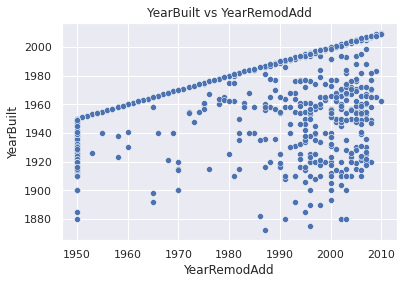

In [67]:
sns.scatterplot(data = training, x = 'YearRemodAdd', y = 'YearBuilt')
plt.title('YearBuilt vs YearRemodAdd')

We see from the linear line at the right of the graph, many properties had no remodeling. The proportion is shown below.

In [68]:
(training['YearBuilt'] != training['YearRemodAdd']).mean()

0.4767123287671233

We will convert YearRemodAdd into a categorical variable. 0 will represent if no remodelling has occurred. 1 will represent if it occurred within the past 20 years. 2 will represent if it occurred prior to the past 20 years.

We see that YearRemodAdd only goes back as far as 1950. Without extra information, we assume all houses built prior to 1950 have been remodeled.

In [69]:
for df in [training, testing]:
    
    df['hasRemod'] = df['YearRemodAdd'] - df['YearBuilt']
    
    for index, row in df.iterrows():
        if (row['hasRemod'] > 0):
            if row['YearRemodAdd'] >= 1997:
                df.loc[index, 'hasRemod'] = 1
            else:
                df.loc[index, 'hasRemod'] = 2
        else:
                df.loc[index, 'hasRemod'] = 0
        
    
    df['hasRemod'] = df['hasRemod'].astype('category')
    df.drop(['YearRemodAdd'], axis = 1, inplace = True)

catF.append('hasRemod')
numericF.remove('YearRemodAdd')

We see that 52% of properties had no remodelling. 23% had a recent remodeling and 23% had an old remodeling.

Text(0.5, 1.0, 'SalePrice by Remod')

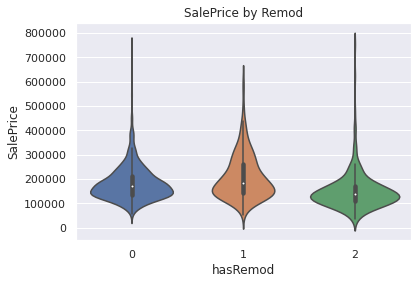

In [70]:
sns.violinplot(data = training, x = 'hasRemod', y = 'SalePrice')
plt.title('SalePrice by Remod')

We saw previously that the year the house was sold have no correlation with the SalePrice.

In [71]:
#Correlation
training.corr()['YrSold']['SalePrice']

-0.028922585168736813

Perhaps the age the house was when it was sold gives a better indication of the SalePrice?

In [72]:
for df in [training, testing]:
    df['YearBuilt'] = df['YrSold'] - df['YearBuilt']
    df.rename(columns = {'YearBuilt' : 'AgeSold'}, inplace = True)

    

Text(0.5, 1.0, 'AgeSold vs SalePrice')

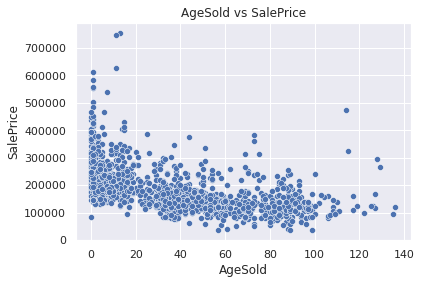

In [73]:
sns.scatterplot(data = training, x = 'AgeSold', y = 'SalePrice')
plt.title('AgeSold vs SalePrice')

In [74]:
##Correlation
training.corr()['AgeSold']['SalePrice']

-0.5233504175468151

We see that, in general, the younger the house, the higher the sale price was. To reduce the number of years, we will create an 'AgeBin' feature which groups together houses of a similar age.

What is the current distribution of AgeSold?

Text(0.5, 1.0, 'Histogram of AgeSold : BinWidth = 10years')

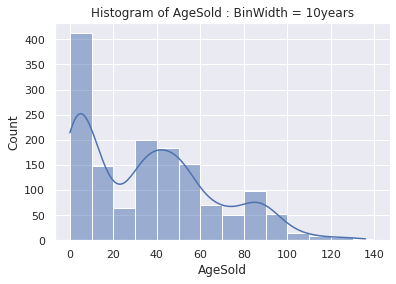

In [75]:
sns.histplot(data = training, x = 'AgeSold', binwidth = 10, kde = True)
plt.title('Histogram of AgeSold : BinWidth = 10years')

We see that AgeSold if right skewed. Most of the homes sold were new. 

In [76]:
for df in [training, testing]:
    
    df['Agebin'] = pd.cut(df['AgeSold'], bins = [0,10,20,30,40,50,60,70,80, 90, 100, 110, 120, 130, 140],
                          labels = np.arange(0,14,1), right = False)

    df['Agebin'] = df['Agebin'].astype('category')
    
training[['Agebin', 'AgeSold']]

,Agebin,AgeSold
0,0,5
1,3,31
2,0,7
3,9,91
4,0,8
...,...,...
1455,0,8
1456,3,32
1457,6,69
1458,6,60


In [77]:
testing['Agebin']

0       4
1       5
2       1
3       1
4       1
       ..
1454    3
1455    3
1456    4
1457    1
1458    1
Name: Agebin, Length: 1459, dtype: category
Categories (14, int64): [0 < 1 < 2 < 3 ... 10 < 11 < 12 < 13]

In [78]:
#Dropping AgeSold
training.drop(['AgeSold'], axis = 1, inplace = True)
testing.drop(['AgeSold'], axis = 1, inplace = True)

Text(0.5, 1.0, 'SalePrice by Agebin')

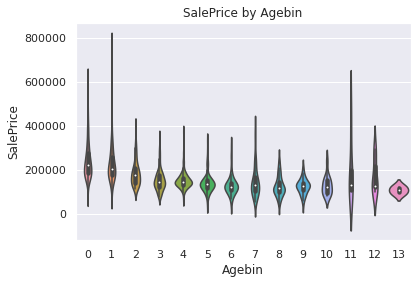

In [79]:
sns.violinplot(data = training, x = 'Agebin', y = 'SalePrice')
plt.title('SalePrice by Agebin')

In [80]:
numericF.remove('YearBuilt')
numericF.remove('YrSold')
catF.append('Agebin')
catF.append('YrSold')

training['YrSold'] = training['YrSold'].astype('category')
testing['YrSold'] = testing['YrSold'].astype('category')

In [81]:
numericF

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice',
 'logSalePrice']

Perhaps OverallQual and OverallCond should be categorical too?

# Correlation 

We look at highly correlated fatures again.

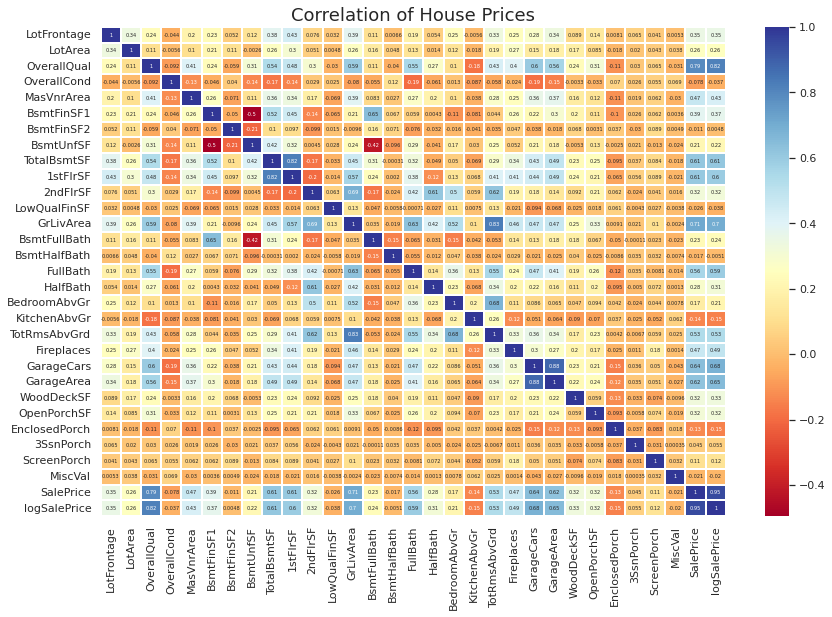

In [82]:
#Correlation

corr = training.corr()
plt.figure(figsize=(14,9))
plt.title('Correlation of House Prices', fontsize=18)
sns.heatmap(corr,cmap='RdYlBu',linewidths=0.2,annot_kws={'size':5}, annot = True)
plt.show()

Let us gather the columns which are highly correlated with another.

In [83]:
#Getting Abs Val Correlation
corr_df = training.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype = bool))
tri_df = corr_df.mask(mask)

tri_df

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,logSalePrice
LotFrontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,0.335957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,0.239546,0.105806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,0.043595,0.005636,0.091932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,0.195830,0.103321,0.407252,0.125694,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,0.232576,0.214103,0.239666,0.046231,0.261256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,0.052237,0.111170,0.059119,0.040229,0.071330,0.050117,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,0.119174,0.002618,0.308159,0.136841,0.113862,0.495251,0.209294,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,0.381038,0.260833,0.537808,0.171098,0.360067,0.522396,0.104810,0.415360,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,0.434109,0.299475,0.476224,0.144203,0.339850,0.445863,0.097117,0.317987,0.819530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#Columns which are highly correlated to another.
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.8)]


to_drop

['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'SalePrice']

We already know that OverallQual is higly correlated with SalesPrice. Similarly SalesPrice is highlly correlated with logSalePrice. Thus we do not remove them.

We see TotalBsmtSF is correlated to another feature. Which feature is this?

In [85]:
(tri_df.loc[tri_df['TotalBsmtSF'] > 0.8].index)

Index(['1stFlrSF'], dtype='object')

TotalBsmtSF is correlated to 1stFlrSF.

Text(0.5, 1.0, 'TotalBsmtSF vs 1stFlrSF')

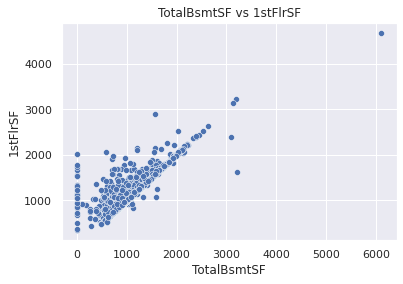

In [86]:
sns.scatterplot(data = training, x = 'TotalBsmtSF', y = '1stFlrSF')
plt.title('TotalBsmtSF vs 1stFlrSF')

We see there is a strong positive correlation.

I will drop whichever feature is less correlated to SalesPrice.

In [87]:
training.corr()['SalePrice'][['TotalBsmtSF', '1stFlrSF']]

TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

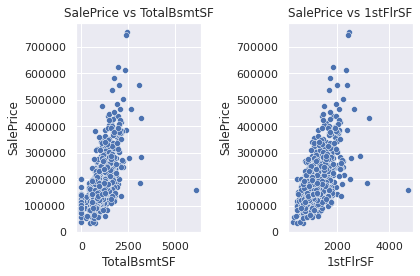

In [88]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = training, x = 'TotalBsmtSF', y = 'SalePrice', ax = ax[0])
sns.scatterplot(data = training, x = '1stFlrSF', y = 'SalePrice', ax = ax[1])

ax[0].set_title('SalePrice vs TotalBsmtSF')
ax[1].set_title('SalePrice vs 1stFlrSF')

plt.tight_layout()
plt.show()

In [89]:
#Removing 1stFlrSF
training.drop(['1stFlrSF'], axis = 1, inplace = True)
testing.drop(['1stFlrSF'], axis = 1, inplace = True)
numericF.remove('1stFlrSF')

We see GarageCars is strongly correlatied to another feature. The feature is GarageArea. This makes sense as a bigger garage can hold more cars.

In [90]:
(tri_df.loc[tri_df['GarageCars'] > 0.8].index)

Index(['GarageArea'], dtype='object')

([<matplotlib.axis.XTick at 0x7f88be74ead0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

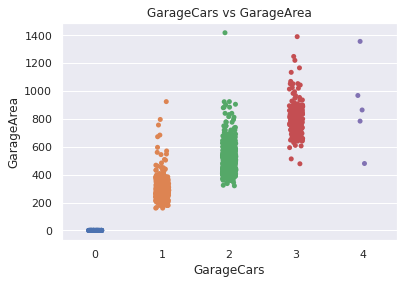

In [91]:
sns.stripplot(y = 'GarageArea', x = 'GarageCars', data = training)
plt.title('GarageCars vs GarageArea')
plt.xticks([0,1,2,3,4])

I will drop whichever feature is less correlated to SalesPrice.

In [92]:
training.corr()['SalePrice'][['GarageArea', 'GarageCars']]

GarageArea    0.623431
GarageCars    0.640409
Name: SalePrice, dtype: float64

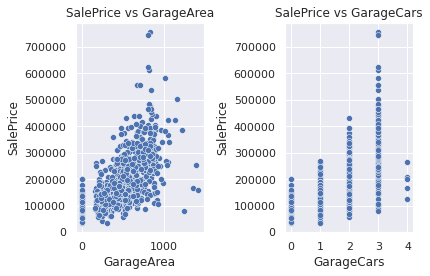

In [93]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = training, x = 'GarageArea', y = 'SalePrice', ax = ax[0])
sns.scatterplot(data = training, x = 'GarageCars', y = 'SalePrice', ax = ax[1])

ax[0].set_title('SalePrice vs GarageArea')
ax[1].set_xticks([0,1,2,3,4]) 
ax[1].set_title('SalePrice vs GarageCars')

plt.tight_layout()
plt.show()

In [94]:
#Dropping GarageArea
training.drop(['GarageArea'], axis = 1, inplace = True)
testing.drop(['GarageArea'], axis = 1, inplace = True)
numericF.remove('GarageArea')

We see GrLivArea is higly correlated to another.

In [95]:
(tri_df.loc[tri_df['GrLivArea'] > 0.8].index)

Index(['TotRmsAbvGrd'], dtype='object')

GrLivArea is strongly correlated to TotRmsAbvGrd. This makes sense as the larger the house, the more rooms you can expect there to be.

Text(0.5, 1.0, 'TotRmsAbvGrd vs GrLivArea')

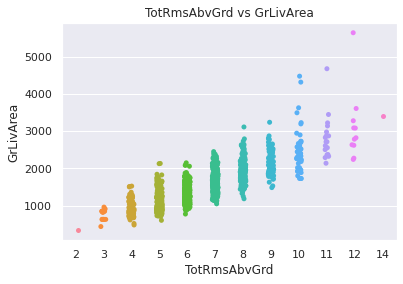

In [96]:
sns.stripplot(data = training, y = 'GrLivArea', x = 'TotRmsAbvGrd')
plt.title('TotRmsAbvGrd vs GrLivArea')

We will drop the feature which is less correllated with SalesPrice.

In [97]:
training.corr()['SalePrice'][['GrLivArea', 'TotRmsAbvGrd']]

GrLivArea       0.708624
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

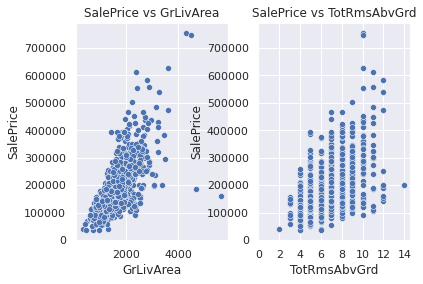

In [98]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = training, x = 'GrLivArea', y = 'SalePrice', ax = ax[0])
sns.scatterplot(data = training, x = 'TotRmsAbvGrd', y = 'SalePrice', ax = ax[1])

ax[0].set_title('SalePrice vs GrLivArea')
ax[1].set_xticks([0,2,4,6,8,10,12,14]) 
ax[1].set_title('SalePrice vs TotRmsAbvGrd')

plt.show()

In [99]:
training.drop(['TotRmsAbvGrd'], axis = 1, inplace = True)
testing.drop(['TotRmsAbvGrd'], axis = 1, inplace = True)
numericF.remove('TotRmsAbvGrd')

## Outliers

Next we will try to identify outliers. First we will identify outliers of the SalePrice.

In [100]:
LQ = training['SalePrice'].describe()['25%']
UQ = training['SalePrice'].describe()['75%']

outliers = training.loc[(training['SalePrice'] > UQ + 1.5*(UQ - LQ)) | (training['SalePrice'] < LQ - 1.5*(UQ - LQ))]

training['outlier'] = (training['SalePrice'] > UQ + 1.5*(UQ - LQ)) | (training['SalePrice'] < LQ - 1.5*(UQ - LQ))

In [101]:
cnt = training['outlier'].sum()
prop = training['outlier'].mean()

print('{} SalePrices ({}% of SalePrices) are outliers'.format(cnt, np.floor(prop*100)))

61 SalePrices (4.0% of SalePrices) are outliers


We shall plot SalePrices against GrLivArea to see if we can learn more - GrLivArea is the most correlated numeric feature with SalesPrice.

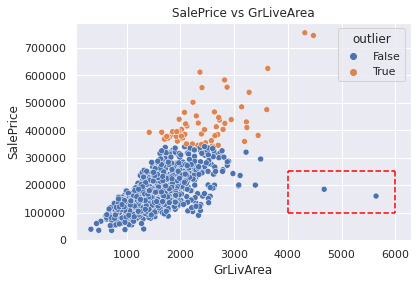

In [102]:
sns.scatterplot(data = training, x = 'GrLivArea', y = 'SalePrice', hue = 'outlier')
plt.title('SalePrice vs GrLiveArea')

plt.plot([4000, 4000], [100000, 250000], color = 'red', linestyle = '--')
plt.plot([4000, 6000], [250000, 250000], color = 'red', linestyle = '--')
plt.plot([6000, 6000], [250000, 100000], color = 'red', linestyle = '--')
plt.plot([4000, 6000], [100000, 100000], color = 'red', linestyle = '--')

plt.show()

The outliers of SalesPrice follow the trend of a higher SalesPrice correlates to a larger GrLivArea. However, examining the bottom right of the above scatterplot, the two largest homes in terms of GrLivAre do not follow this trend. Let us examine these two rows in more detail.

In [103]:
#Dropping Outlier Column Now
training.drop(['outlier'], axis = 1, inplace = True)

In [104]:
#Getting two rows of interest.
rows_of_interest = training.loc[(training['SalePrice'] < 300000) & (training['GrLivArea'] > 4000)]
rows_of_interest

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice,hasRemod,Agebin
523,60,RL,130.0,40094,Pave,NA,IR1,Bnk,AllPub,Inside,...,NA,0,10,2007,New,Partial,184750,12.126759,1,0
1298,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,...,NA,0,1,2008,New,Partial,160000,11.982929,0,0


In [105]:
#Dropping Rows
training.drop([523, 1298], axis = 0, inplace = True)

# Quasi-Constant Data

Next we will remove categorical features which are quasi-constant, i.e. most entries are the same value.

First we identify the categorical columns where more than 98% of the entries are the same.

In [106]:
#Checking categorical columns

quasi_const_catF = []

for col in catF:
    
    #getting value counts
    temp_counts = training[col].value_counts(normalize = True)
    
    #Checking if the mostbuilt
    
    #frequent entry occurred more than 98& of the time
    if temp_counts[0] > 0.98:
        print(col, temp_counts.index[0], temp_counts[0])
        quasi_const_catF.append(col)

Street Pave 0.9958847736625515
Utilities AllPub 0.9993141289437586
Condition2 Norm 0.99039780521262
RoofMatl CompShg 0.9828532235939643


For 'Street', 'Pave' was entered over 99.5% of the time.

For 'Utilities', 'AllPub' was entered over 99.9% of the time.

For 'Condition2', 'Norm' was entered over 98.9% of the time.

For 'RoofMatl', 'CompShg' was entered over 98.2% of the time.

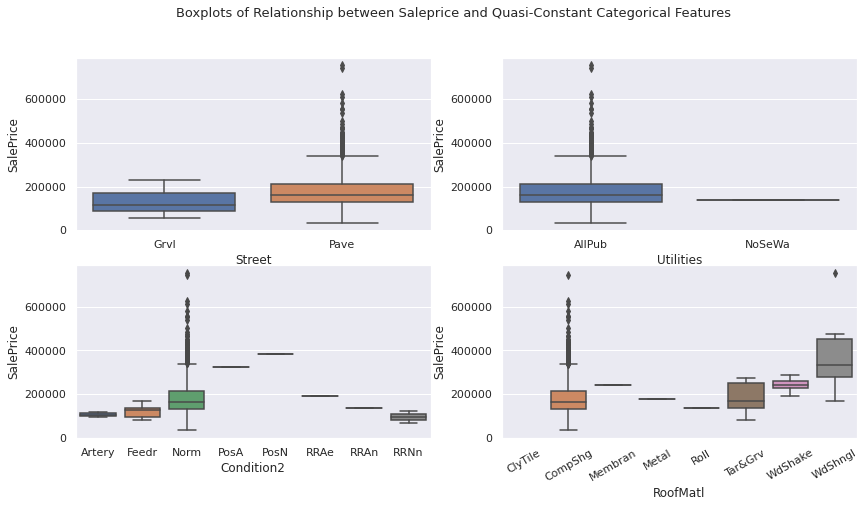

In [107]:
fig, ax = plt.subplots(2,2, figsize = (14,7))

plt.suptitle('Boxplots of Relationship between Saleprice and Quasi-Constant Categorical Features', fontsize=13)
sns.boxplot(data = training, y = 'SalePrice', x  = 'Street', ax = ax[0,0])
sns.boxplot(data = training, y = 'SalePrice', x  = 'Utilities', ax = ax[0,1])
sns.boxplot(data = training, y = 'SalePrice', x  = 'Condition2', ax = ax[1,0])
sns.boxplot(data = training, y = 'SalePrice', x  = 'RoofMatl', ax = ax[1,1])
ax[1,1].tick_params(axis='x', rotation=30)

plt.show()

We delete these four features.

In [108]:
#Deleting the four columns
for col in quasi_const_catF:
    training.drop([col], axis = 1, inplace = True)
    testing.drop([col], axis = 1, inplace = True)
    catF.remove(col)

# Rare Categories

Next, for categorical variables that are present less that 1% of the time we will combine into a single 'Rare' category.

First we transform 'OveralQual' and 'OveralCond' to type category.

In [109]:
for df in [training, testing]:
    df['OverallQual'] = df['OverallQual'].astype('category')
    df['OverallCond'] = df['OverallCond'].astype('category')

numericF.remove('OverallQual')
numericF.remove('OverallCond')

In [110]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1458 non-null   category
 1   MSZoning       1458 non-null   category
 2   LotFrontage    1458 non-null   float64 
 3   LotArea        1458 non-null   int64   
 4   Alley          1458 non-null   category
 5   LotShape       1458 non-null   category
 6   LandContour    1458 non-null   category
 7   LotConfig      1458 non-null   category
 8   LandSlope      1458 non-null   category
 9   Neighborhood   1458 non-null   category
 10  Condition1     1458 non-null   category
 11  BldgType       1458 non-null   category
 12  HouseStyle     1458 non-null   category
 13  OverallQual    1458 non-null   category
 14  OverallCond    1458 non-null   category
 15  RoofStyle      1458 non-null   category
 16  Exterior1st    1458 non-null   category
 17  Exterior2nd    1458 non-null   ca

In [111]:
numRows = training.shape[0]

for col in catF:
    
    temp = (training.groupby(col)['SalePrice'].count())/numRows
    
    temp_df = temp[temp > 0.01].index
    
    training[col] = np.where(training[col].isin(temp_df), training[col], 'Rare')
    testing[col] = np.where(testing[col].isin(temp_df), testing[col], 'Rare')

In [112]:
catF.append('OverallQual')
catF.append('OverallCond')

# New Features

We have already changed and added some features such as 'hasRemod'.

**Bathrooms**

There are four features related to bathrooms. Let us look at the correlation between SalePrice and these.

In [113]:
training.corr()['SalePrice'][['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]

BsmtFullBath    0.228459
BsmtHalfBath   -0.016881
FullBath        0.562165
HalfBath        0.284590
Name: SalePrice, dtype: float64

In [114]:
bath_df = pd.DataFrame()
bath_df['Totalbaths'] = 0.5*(training['HalfBath'] + training['BsmtHalfBath']) + training['BsmtFullBath'] + training['FullBath']
bath_df['SalePrice'] = training['SalePrice']

bath_df.corr()

del(bath_df)

We see Totalbaths is highly correlated to SalePrice. We add it as a feature.

In [115]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1459 non-null   object  
 1   MSZoning       1459 non-null   object  
 2   LotFrontage    1459 non-null   float64 
 3   LotArea        1459 non-null   int64   
 4   Alley          1459 non-null   object  
 5   LotShape       1459 non-null   object  
 6   LandContour    1459 non-null   object  
 7   LotConfig      1459 non-null   object  
 8   LandSlope      1459 non-null   object  
 9   Neighborhood   1459 non-null   object  
 10  Condition1     1459 non-null   object  
 11  BldgType       1459 non-null   object  
 12  HouseStyle     1459 non-null   object  
 13  OverallQual    1459 non-null   category
 14  OverallCond    1459 non-null   category
 15  RoofStyle      1459 non-null   object  
 16  Exterior1st    1459 non-null   object  
 17  Exterior2nd    1459 non-null   ob

In [116]:
bathF = ['HalfBath', 'BsmtHalfBath', 'BsmtFullBath', 'FullBath']

for df in [training, testing]: 
    
    df['totalBaths'] = 0.5*(df['HalfBath'] + df['BsmtHalfBath']) + df['BsmtFullBath'] + df['FullBath']

numericF.append('totalBaths')
#training.drop(bathF, axis = 1, inplace = True)
#testing.drop(bathF, axis = 1, inplace = True)

**Porches**

There are five features related to porches / decking. Let us look at the correlation between SalePrice and these.

In [117]:
porchF = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

porch_df = pd.DataFrame({'WoodDeckSF' : training['WoodDeckSF'], 'OpenPorchSF' : training['OpenPorchSF'], 'EnclosedPorch' : training['EnclosedPorch'],
                         '3SsnPorch' : training['3SsnPorch'], 'ScreenPorch' : training['ScreenPorch'], 'SalePrice' : training['SalePrice']})
                        
porch_df['totalPorch'] = training['WoodDeckSF'] + training['OpenPorchSF'] + training['EnclosedPorch'] + training['3SsnPorch'] + training['ScreenPorch']

                         
porch_df.corr()['SalePrice'][['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'totalPorch']]


WoodDeckSF       0.324758
OpenPorchSF      0.321142
EnclosedPorch   -0.128646
3SsnPorch        0.044568
ScreenPorch      0.111415
totalPorch       0.392897
Name: SalePrice, dtype: float64

We see totalPorch is more correlated to SalePrice than each porch feature individually. We add it as a feature.

In [118]:
for df in [training, testing]:
    df['totalPorch'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

numericF.append('totalPorch')
    
#training.drop(porchF, axis = 1, inplace = True)
#testing.drop(porchF, axis = 1, inplace = True)

# Skew

Some of our features skew either left or right. We remove this skewnes with transformations.

In [119]:
testing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence',
       'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
    

In [120]:
#Collecting Continuous features
continuousF = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
               'ScreenPorch', 'MiscVal', 'totalPorch']

For our continuous features, we check whether the feautre has a skew less than -0.5 or greater than 0.5.

In [121]:
from scipy.stats import skew

#Creating a skew dataframa
skew_df = pd.DataFrame(training[continuousF].columns, columns = ['Feature'])
skew_df['skew'] = skew_df['Feature'].apply(lambda feature: skew(training[feature]))
skew_df['abs_skew'] = skew_df['skew'].apply(abs)
skew_df['skewed']= skew_df['abs_skew'] > 0.5

skew_df

,Feature,skew,abs_skew,skewed
0,LotFrontage,1.546174,1.546174,True
1,LotArea,12.560986,12.560986,True
2,MasVnrArea,2.693554,2.693554,True
3,BsmtFinSF1,0.764002,0.764002,True
4,BsmtFinSF2,4.247550,4.247550,True
5,BsmtUnfSF,0.919955,0.919955,True
6,TotalBsmtSF,0.511177,0.511177,True
7,2ndFlrSF,0.812121,0.812121,True
8,LowQualFinSF,8.995688,8.995688,True
9,GrLivArea,1.009951,1.009951,True


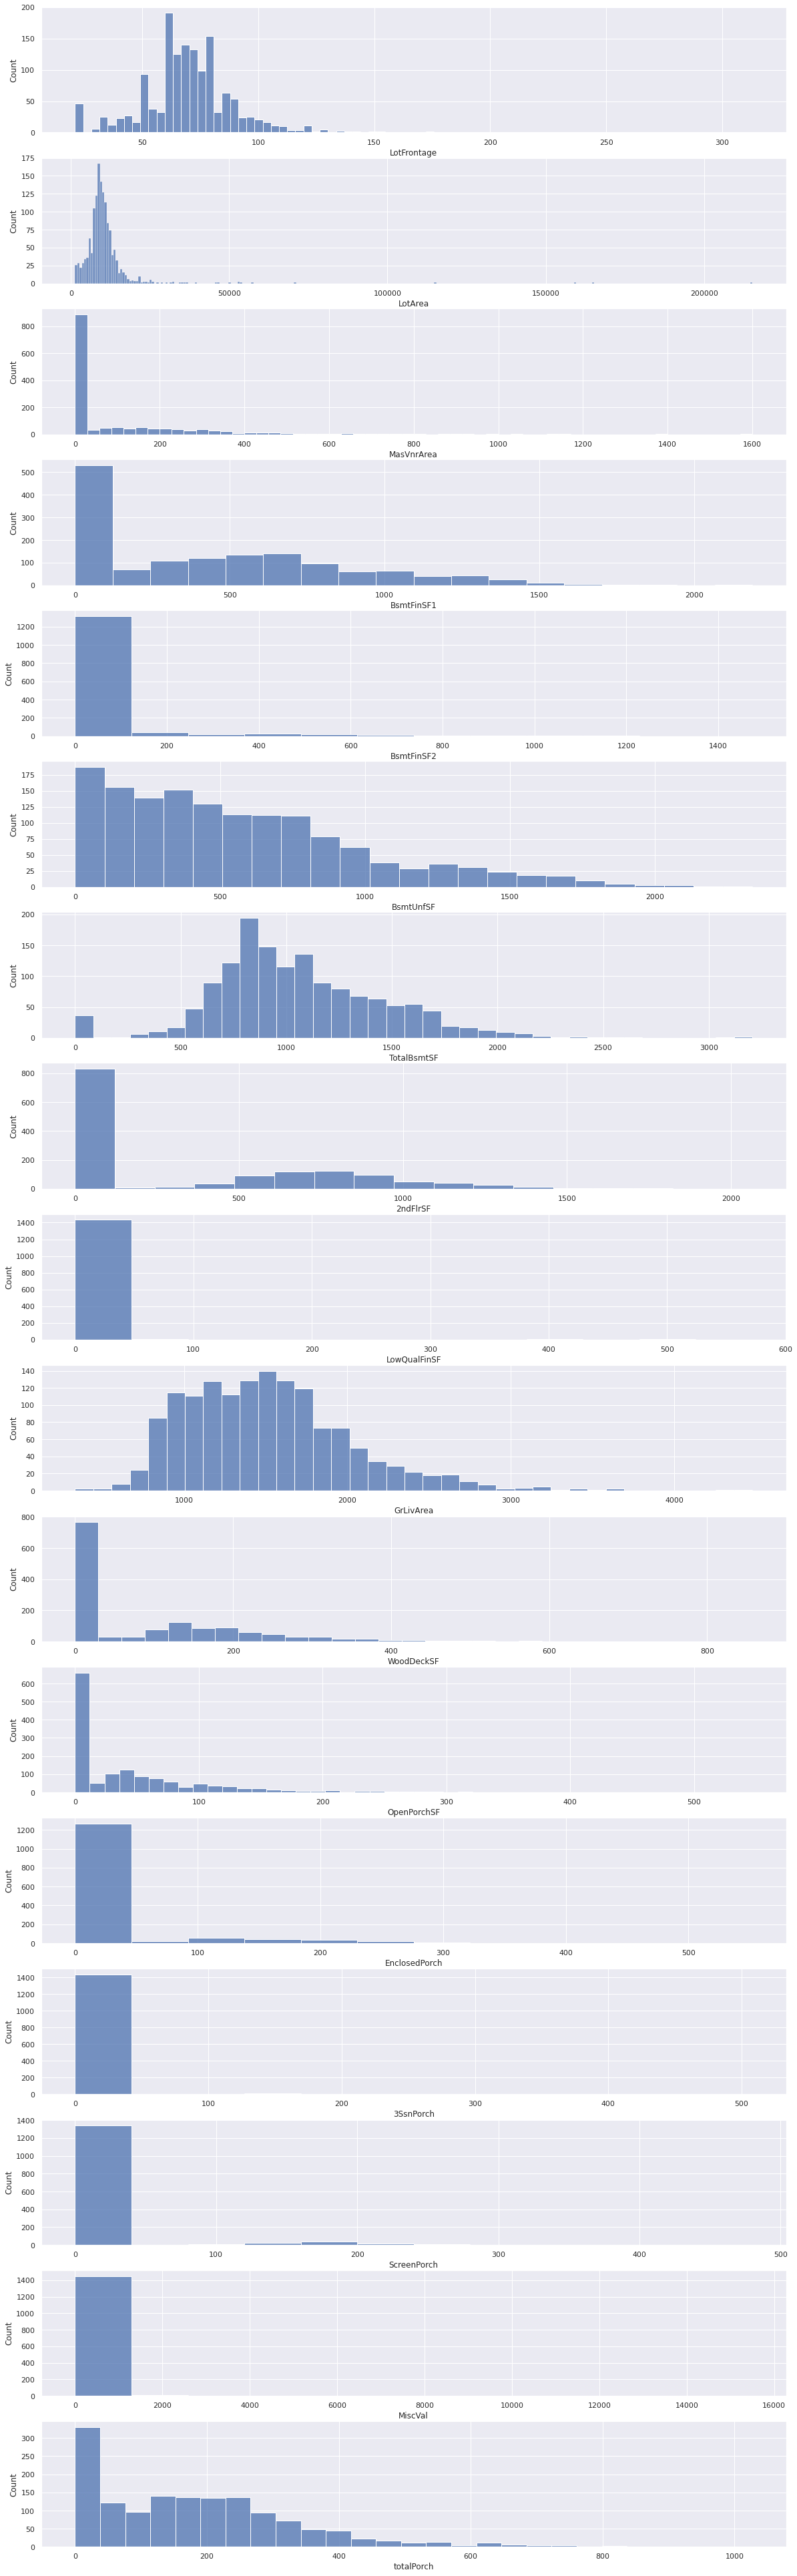

In [122]:
#Plotting features
fig, ax = plt.subplots(17, 1, figsize = (20,70), sharex = False)

i = 0
for col in continuousF:
    sns.histplot(data = training, x = col, ax = ax[i])
    i = i+1

plt.show()

We perfrom a log1p transformation to remove skewness of those with an absolute skew value greater than 0.5.

In [123]:
#Checking which features need to be skewed
for col in skew_df.loc[skew_df['skewed']]['Feature'].values:
    for df in [training,testing]:
        df[col] = np.log1p(df[col])

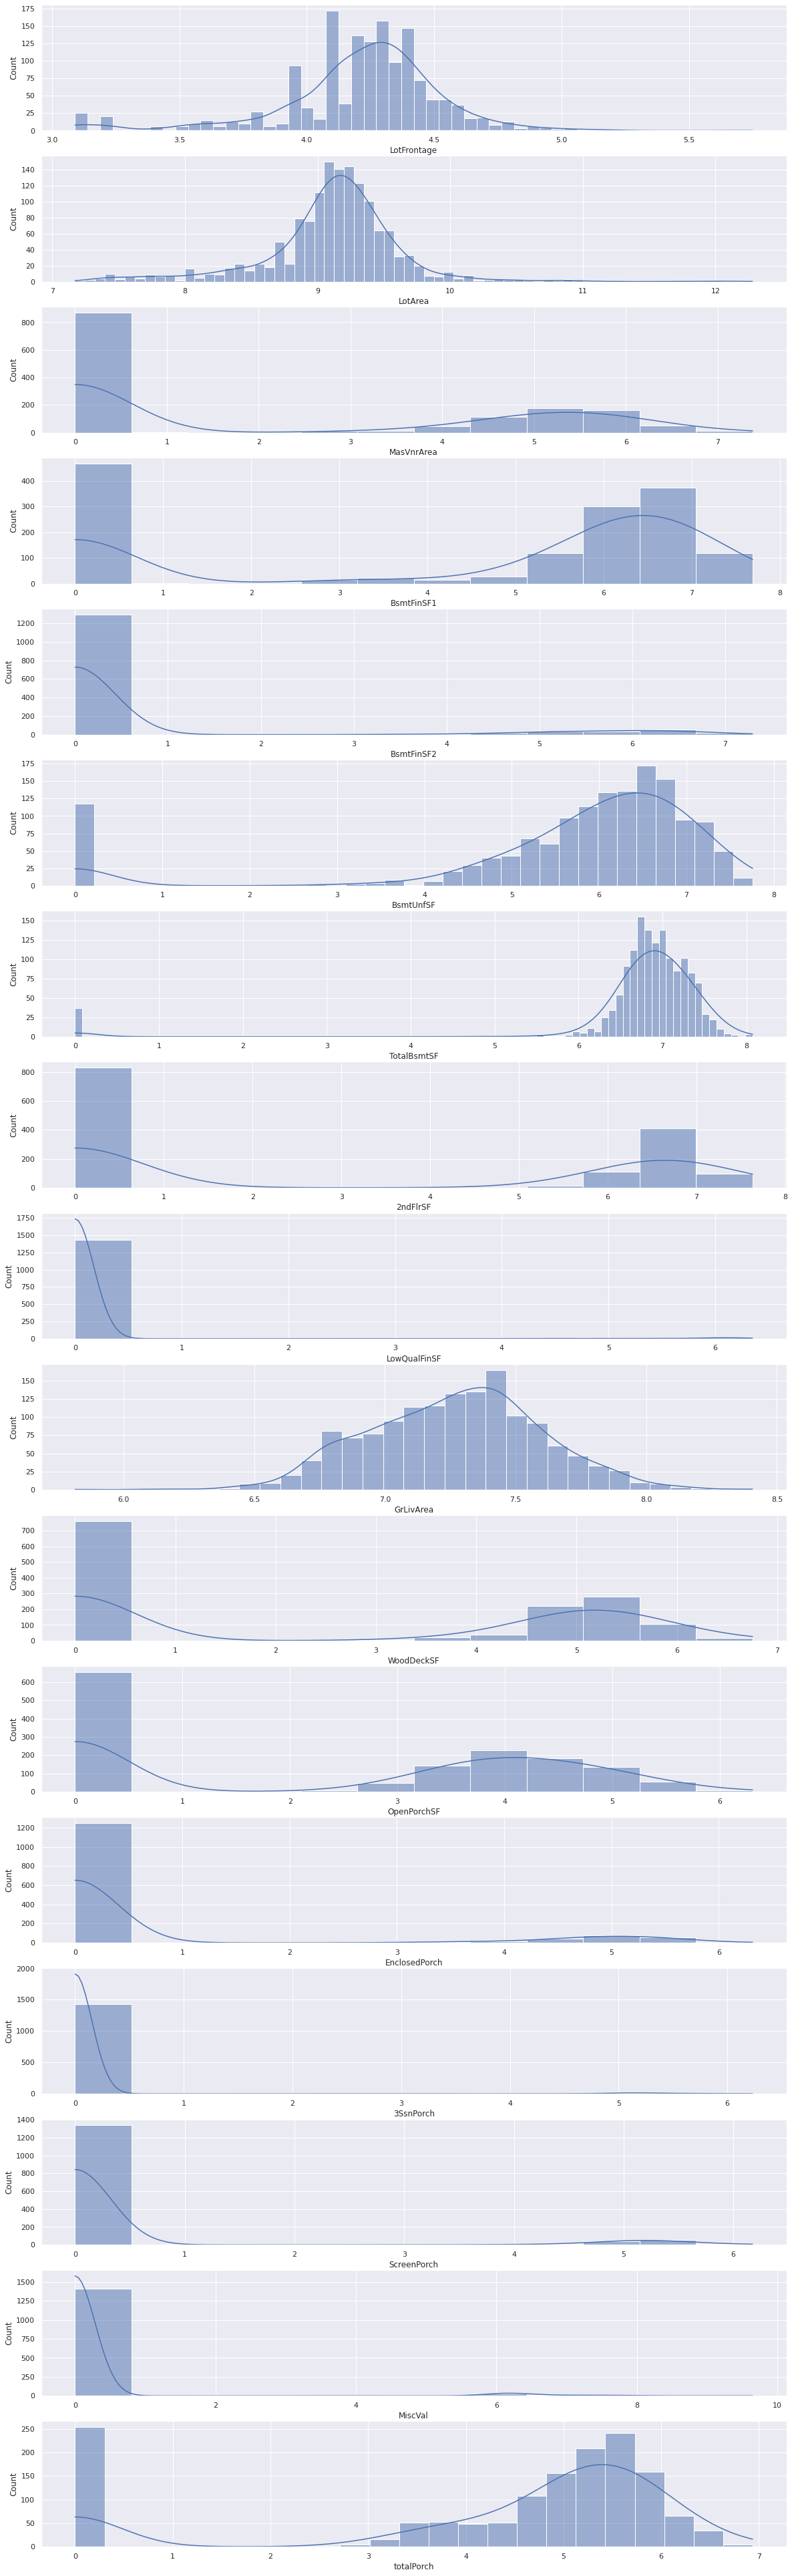

In [124]:
#Plotting Skewed features
fig, ax = plt.subplots(17, 1, figsize = (20,70), sharex = False)

i = 0
for col in continuousF:
    sns.histplot(data = training, x = col, ax = ax[i], kde = True)
    i = i+1

plt.show()

In [125]:
#Creating a skew dataframa
skew_df = pd.DataFrame(training[continuousF].columns, columns = ['Feature'])
skew_df['skew'] = skew_df['Feature'].apply(lambda feature: skew(training[feature]))
skew_df['abs_skew'] = skew_df['skew'].apply(abs)
skew_df['skewed']= skew_df['abs_skew'] > 0.5

skew_df

,Feature,skew,abs_skew,skewed
0,LotFrontage,-0.999290,0.999290,True
1,LotArea,-0.181091,0.181091,False
2,MasVnrArea,0.505791,0.505791,True
3,BsmtFinSF1,-0.617460,0.617460,True
4,BsmtFinSF2,2.518628,2.518628,True
5,BsmtUnfSF,-2.182119,2.182119,True
6,TotalBsmtSF,-5.166992,5.166992,True
7,2ndFlrSF,0.292482,0.292482,False
8,LowQualFinSF,7.447271,7.447271,True
9,GrLivArea,-0.070939,0.070939,False


# Encode Categorical

First we split our data into Train / Test Sets.

In [126]:
X_train = training

y_train = X_train['logSalePrice']
X_train.drop(['SalePrice', 'logSalePrice'], axis = 1, inplace = True)

X_test = testing

Next we check if every column in X_train is in X_test when we perform dummy encoding.

In [127]:
#Any features in X_train that are not in X_test?

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
A = set(X_train.columns)
B = set(X_test.columns)

print('In train but not test', A.difference(B))

print('In test but not train', B.difference(A))

In train but not test {'Agebin_0', 'Agebin_7', 'Agebin_8', 'Agebin_9', 'Agebin_1', 'Agebin_4', 'Agebin_5', 'Agebin_2', 'Agebin_6', 'Agebin_3'}
In test but not train {'Agebin_1.0', 'Agebin_9.0', 'Agebin_7.0', 'Agebin_4.0', 'Agebin_0.0', 'Agebin_3.0', 'Agebin_2.0', 'Agebin_8.0', 'Agebin_5.0', 'Agebin_6.0'}


We see that the name of the age columns is different in both. One is integer based, the other decimal based.

In [128]:
X_test.rename(columns = {'Agebin_0.0' : 'Agebin_0', 'Agebin_1.0': 'Agebin_1', 'Agebin_2.0' : 'Agebin_2', 'Agebin_3.0' : 'Agebin_3',
                         'Agebin_4.0' : 'Agebin_4', 'Agebin_5.0' : 'Agebin_5', 'Agebin_6.0' : 'Agebin_6', 'Agebin_7.0' : 'Agebin_7',
                         'Agebin_8.0' : 'Agebin_8', 'Agebin_9.0' : 'Agebin_9'}, inplace = True)

A = set(X_train.columns)
B = set(X_test.columns)

print('In train but not test', A.difference(B))

print('In test but not train', B.difference(A))

In train but not test set()
In test but not train set()


In [129]:
#Checking if columns are in the same order

list(X_train.columns)  == list(X_test.columns)

True

# Model Building

First I will plot the explained variance ratio of the principal components.

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

scaler = StandardScaler()
pca = PCA()
X_train_scaled = scaler.fit_transform(X_train, y_train)
pca.fit(X_train_scaled)

PCA()

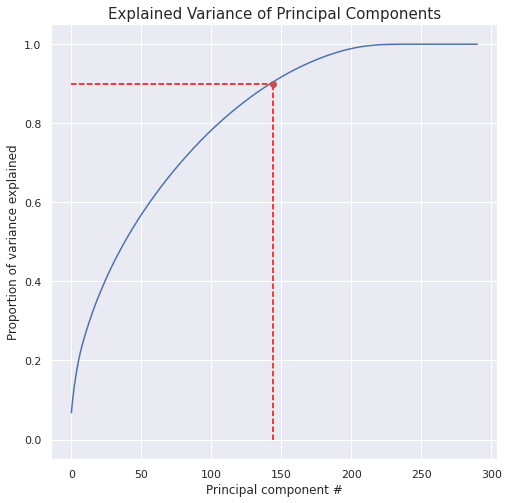

In [131]:
fig = plt.subplots(1,1, figsize= (8,8))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.title('Explained Variance of Principal Components', size = 15)

plt.plot([144, 144], [0, 0.9], color = 'red', linestyle = '--')
plt.plot([0, 144], [0.9, 0.9], color = 'red', linestyle = '--')
plt.plot(144, 0.9, 'ro')

In [132]:
'We see that 90% of the variance can be explained by the first {} components'.format((np.cumsum(pca.explained_variance_ratio_) <= .90).sum() +1)

'We see that 90% of the variance can be explained by the first 144 components'

From previous examinations, doing dimension reductionvia PCA did not lead to any improvements.

I will perform a cross_val_score on the training data using 14 different types of models. The models will be left in their default tuning. This is done to get a collection of baseline models to use later.

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

rmse_scores = []

In [134]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


names = ['Linear', 'Lasso', 'Ridge', 'DTree', 'RForest', 'KNeighbours', 'Bayesian Ridge', 'AdaBoost', 'GradientBoost',
        'Huber', 'SVR', 'CatBoost', 'XGB', 'LightGBM']

models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor(), BayesianRidge(), AdaBoostRegressor(),
         GradientBoostingRegressor(), HuberRegressor(max_iter=1000), SVR(), CatBoostRegressor(verbose = False), XGBRegressor(), LGBMRegressor()]

Taking each model, we use 90% of the principal components, and perform a 10-fold cross validation. We collect the RMSEs of the scores.

Now with 100% PCA

In [135]:
rmse = []
for i in np.arange(len(names)):
    
    pipe = Pipeline([('scaler', scaler), #('pca', PCA(n_components = 0.9)), 
                     (names[i], models[i])])
    
    scores = np.sqrt(-1*cross_val_score(pipe, X = X_train, y = y_train, scoring = 'neg_mean_squared_error', cv = 10))
    
    print(names[i])
    print(scores)
    mean_scores = scores.mean()
    print(mean_scores)
    rmse.append(mean_scores)
    print('\n\n')


Linear
[1.23737898e-01 1.02479956e-01 1.82554181e+09 4.15984477e+09
 1.50955899e-01 2.50752960e+07 1.20270475e-01 9.95396764e-02
 1.00750379e-01 1.26099776e-01]
601046187.7823654



Lasso
[0.3787016  0.39536377 0.42448273 0.42611361 0.4549093  0.35935525
 0.3933586  0.37174291 0.38087432 0.40353042]
0.39884325102058116



Ridge
[0.12316234 0.10235594 0.10695198 0.12833583 0.15050726 0.10859662
 0.1200757  0.09935082 0.10067761 0.12607502]
0.11660891309147378



DTree
[0.21090498 0.18290652 0.22312856 0.20260395 0.25525808 0.21014023
 0.2152709  0.19145832 0.21610494 0.2338406 ]
0.2141617083935154



RForest
[0.14092461 0.13072708 0.14631831 0.14915186 0.17720224 0.11853893
 0.1497297  0.13029843 0.13046087 0.14028327]
0.14136352934315238



KNeighbours
[0.17904644 0.17650652 0.20729408 0.20267188 0.22072887 0.17248913
 0.20208789 0.1642188  0.1669508  0.20272967]
0.18947240637626742



Bayesian Ridge
[0.11906721 0.10154378 0.11015314 0.12575613 0.14855984 0.10468376
 0.11828978 0.09652

Below we rank our baseline models based on their RMSE. The exp_RMSE column is transforming the RMSE back into the original scale of the data as currently our target data has been np.log1p'ed.

In [136]:
prelimScores = pd.DataFrame({'Model' : names, 'RMSE' : rmse})

prelimScores['MSE'] = prelimScores['RMSE']**2

prelimScores['exp_RMSE'] = np.exp(prelimScores['RMSE'])-1
prelimScores.sort_values('exp_RMSE')

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Model,RMSE,MSE,exp_RMSE
9,Huber,1.118570e-01,1.251199e-02,0.118353
6,Bayesian Ridge,1.149520e-01,1.321395e-02,0.121820
11,CatBoost,1.164701e-01,1.356529e-02,0.123524
2,Ridge,1.166089e-01,1.359764e-02,0.123680
8,GradientBoost,1.259734e-01,1.586929e-02,0.134252
13,LightGBM,1.295784e-01,1.679057e-02,0.138348
12,XGB,1.356689e-01,1.840606e-02,0.145303
4,RForest,1.413635e-01,1.998365e-02,0.151843
7,AdaBoost,1.765173e-01,3.115834e-02,0.193055
10,SVR,1.798896e-01,3.236025e-02,0.197085


With PCA = 0.9:

Without any tuning, Bayesian Ridge was the best model with an RMSE of $0.131853. 

Below we create a baseline submission (simple_bayesridge.csv) with the Bayesian Ridge model. It ended up scoring **0.14546**.

WITHOUT PCA: 

Without any tuning, Huber was the best model with an RMSE of $0.118. 

In [137]:
#Making Submission with best - huber

huber_pipe = Pipeline([('scaler', scaler), #('pca', PCA(n_components = 0.9)), 
                       ('huber', HuberRegressor(max_iter=1000))])

huber_pipe.fit(X_train, y_train)

preds = np.expm1(huber_pipe.predict(X_test))

huber_submission = pd.DataFrame({'Id' : testing_Id, 'SalePrice': preds})
huber_submission

huber_submission.to_csv('simple_huber_no_pca.csv',index = False)

In [138]:
huber_submission

,Id,SalePrice
0,1461,127978.853774
1,1462,157055.331050
2,1463,198663.747992
3,1464,202192.528459
4,1465,202363.361436
...,...,...
1454,2915,89080.342571
1455,2916,74887.893384
1456,2917,177694.828787
1457,2918,122176.006023


Just Huber on its own scored **0.1321**.

To continue, I will choose four of the best models to carry forward to the next stage, along with RandomForest:

Bayesian Ridge, Ridge, Huber, CatBoost, and gradient Boosting.

In [139]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [140]:
#Ridge

ridge_pipe = Pipeline([("scaler", scaler), #('pca', PCA(n_components = 0.9)), 
                        ("ridge", Ridge())])

params_ridge = {'ridge__alpha' : [1e-15, 1e-10, 1e-5, 1e-2, 1e-1, 1, 5, 10, 20 , 50, 75, 100, 200, 250 , 500, 750 , 1000]}

ridge_search = GridSearchCV(ridge_pipe, params_ridge, verbose  = True, cv = 10, scoring = 'neg_root_mean_squared_error')

ridge_search.fit(X_train, y_train)

print(ridge_search.best_params_)

print(-1*ridge_search.best_score_)

#{'ridge__alpha': 50}

Fitting 10 folds for each of 17 candidates, totalling 170 fits
{'ridge__alpha': 50}
0.11483929948904367


In [141]:
#Random Forest

#rf_pipe = Pipeline([("scaler", scaler), ('pca', PCA(n_components = 0.9)), 
                       # ("rf", RandomForestRegressor())])

#rf_params = {'rf__bootstrap': [True, False],
               # 'rf__max_depth':  [3,5,10,20,50, None],
               #  'rf__max_features': ['auto', 'sqrt'],
               # 'rf__min_samples_leaf': [1, 2, 4, 10],
               #  'rf__min_samples_split': [2, 5, 10],
               #  'rf__n_estimators': [50, 100, 200, 500]}

#rf_search = RandomizedSearchCV(rf_pipe, rf_params, verbose  = True, n_jobs = -1, n_iter = 30)

#rf_search.fit(X_train, y_train)

#print(rf_search.best_params_)

#print(rf_search.best_score_)

#{'rf__n_estimators': 500, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_features': 'auto', 'rf__max_depth': 20, 'rf__bootstrap': True}

In [142]:
#Bayesian

br_pipe = Pipeline([("scaler", scaler), #('pca', PCA(n_components = 0.9)), 
                        ("br", BayesianRidge())])

br_params = {'br__alpha_init':[0.001, 0.01, 0.1, 1, 1.5, 2, 5, 7, 10, 100, 200, 500],
              'br__lambda_init': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9, 1e-11]}

br_search = GridSearchCV(br_pipe, br_params, verbose  = True, scoring = 'neg_root_mean_squared_error')

br_search.fit(X_train, y_train)

print(br_search.best_params_)

print(-1*br_search.best_score_)

#{'br__alpha_init': 1.9, 'br__lambda_init': 1e-09}

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'br__alpha_init': 5, 'br__lambda_init': 1e-11}
0.11921709275284254


In [143]:
#catboost

cb_pipe = Pipeline([("scaler", scaler), #('pca', PCA(n_components = 0.9)), 
                        ("cb", CatBoostRegressor(verbose = False))])

cb_params = {'cb__boosting_type' : ['Plain'],
            'cb__learning_rate' : [0.01,0.02,0.03,0.04,0.1,0.15],
            'cb__max_depth':[1,3,5,10],
             'cb__n_estimators': [50, 100, 200],
            'cb__leaf_estimation_iterations' : [1,5]}
                 

cb_search = RandomizedSearchCV(cb_pipe, cb_params, verbose  = True, n_jobs = -1, n_iter = 70, cv = 5, random_state = 1010, scoring = 'neg_root_mean_squared_error')

cb_search.fit(X_train, y_train)

print(cb_search.best_params_)

print(-1*cb_search.best_score_)

#
#{'cb__n_estimators': 100, 'cb__max_depth': 5, 'cb__learning_rate': 0.15, 'cb__leaf_estimation_iterations': 1, 'cb__boosting_type': 'Plain'}

#{'cb__n_estimators': 200, 'cb__max_depth': 5, 'cb__learning_rate': 0.1, 'cb__leaf_estimation_iterations': 5, 'cb__boosting_type': 'Plain'}


Fitting 5 folds for each of 70 candidates, totalling 350 fits
{'cb__n_estimators': 200, 'cb__max_depth': 5, 'cb__learning_rate': 0.1, 'cb__leaf_estimation_iterations': 5, 'cb__boosting_type': 'Plain'}
0.11927468961252732


In [144]:
#GradientBoost

gb_pipe = Pipeline([("scaler", scaler), #('pca', PCA(n_components = 0.9)), 
                        ("gb", GradientBoostingRegressor())])

gb_params = {"gb__learning_rate": [0.001, 0.01, 0.1],
            "gb__min_samples_split": [10, 25, 50, 100],
            "gb__min_samples_leaf": [5, 10, 25, 100],
            "gb__max_depth":[5, 10, 20, 50,100]}
                 

gb_search = RandomizedSearchCV(gb_pipe, gb_params, verbose  = True, n_jobs = -1, n_iter = 75, random_state = 1010, cv = 5, scoring = 'neg_root_mean_squared_error')

gb_search.fit(X_train, y_train)

print(gb_search.best_params_)

print(-1*gb_search.best_score_)

#{'gb__min_samples_split': 25, 'gb__min_samples_leaf': 100, 'gb__max_depth': 50, 'gb__learning_rate': 0.1}

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'gb__min_samples_split': 100, 'gb__min_samples_leaf': 5, 'gb__max_depth': 100, 'gb__learning_rate': 0.1}
0.12768546143120435


In [145]:
#Huber

huber_pipe = Pipeline([("scaler", scaler), #('pca', PCA(n_components = 0.9)), 
                        ("huber", HuberRegressor())])

params_huber = {'huber__alpha' : [1e-15, 1e-10, 1e-5, 1e-2, 1e-1, 1, 5, 10, 20 , 50, 75, 100, 200, 250 , 500, 750 , 1000],
               'huber__max_iter' : [1000]}

huber_search = GridSearchCV(huber_pipe, params_huber, verbose  = True, cv = 10, scoring = 'neg_root_mean_squared_error')

huber_search.fit(X_train, y_train)

print(huber_search.best_params_)

print(-1*huber_search.best_score_)

#{'huber__alpha': 250, 'huber__max_iter': 1000}

Fitting 10 folds for each of 17 candidates, totalling 170 fits
{'huber__alpha': 250, 'huber__max_iter': 1000}
0.11101387085097855


We look at how the five best are doing.

In [146]:
best_ridge = ridge_search.best_estimator_
best_huber = huber_search.best_estimator_
best_br = br_search.best_estimator_
best_cb = cb_search.best_estimator_
best_gb = gb_search.best_estimator_
names = ['ridge', 'huber', 'br', 'cb', 'gb']
models = [best_ridge, best_huber, best_br, best_cb, best_gb]
rmse = []

In [147]:
for i in np.arange(0,len(names)):
    
    pipe = Pipeline([('scaler', scaler), #('pca', PCA(n_components = 0.9)), 
                       (names[i], models[i])])
    scores = np.sqrt(-1*cross_val_score(pipe, X = X_train, y = y_train, scoring = 'neg_mean_squared_error', cv = 10))
    rmse.append(np.mean(scores))

In [148]:
prelimScores = pd.DataFrame({'Model' : names, 'RMSE' : rmse})
prelimScores['exp_RMSE'] = np.expm1(prelimScores['RMSE'])
prelimScores.sort_values('exp_RMSE')

,Model,RMSE,exp_RMSE
1,huber,0.111013,0.117410
0,ridge,0.114839,0.121693
2,br,0.114952,0.121820
3,cb,0.119132,0.126519
4,gb,0.125207,0.133383


We see that the Huber model scored the best, while the gradient Boosting model scored the worst.

Training the best estimators on the data:

In [149]:
pipe_ridge = Pipeline([('scaler', scaler), #('pca', PCA(n_components = 0.9)), 
                 ('ridge', best_ridge)])
pipe_ridge.fit(X_train, y_train)


pipe_huber = Pipeline([('scaler', scaler), #('pca', PCA(n_components = 0.9)), 
                 ('huber', best_huber)])
pipe_huber.fit(X_train, y_train)


pipe_br = Pipeline([('scaler', scaler), #('pca', PCA(n_components = 0.9)), 
                 ('br', best_br)])
pipe_br.fit(X_train, y_train)


pipe_cb = Pipeline([('scaler', scaler), #('pca', PCA(n_components = 0.9)), 
                 ('cb', best_cb)])
pipe_cb.fit(X_train, y_train)


pipe_gb = Pipeline([('scaler', scaler), #('pca', PCA(n_components = 0.9)), 
                 ('gb', best_gb)])
pipe_gb.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('gb',
                                  GradientBoostingRegressor(max_depth=100,
                                                            min_samples_leaf=5,
                                                            min_samples_split=100))]))])

Taking a (weighted) average of the predictions:

In [150]:
final_preds = (
                    0.2*np.expm1(pipe_ridge.predict(X_test)) + 
                    0.2*np.expm1(pipe_huber.predict(X_test)) + 
                    0.2*np.expm1(pipe_br.predict(X_test)) +
                    0.2*np.expm1(pipe_cb.predict(X_test)) +
                    0.2*np.expm1(pipe_gb.predict(X_test))

)

final_preds

array([126519.99951022, 157829.71519394, 188328.66737776, ...,
       162814.50007489, 117455.32909087, 207750.54937954])

In [151]:
combo_submission = pd.DataFrame({'Id' : testing_Id, 'SalePrice': final_preds})
combo_submission

#combo_submission.to_csv('combo_submission_no_pca.csv',index = False)

,Id,SalePrice
0,1461,126519.999510
1,1462,157829.715194
2,1463,188328.667378
3,1464,195651.677129
4,1465,194187.314531
...,...,...
1454,2915,85934.221466
1455,2916,77999.550759
1456,2917,162814.500075
1457,2918,117455.329091


In [152]:
combo_submission.to_csv('combo_submission_no_pca.csv',index = False)